# Plot the figures for the GENESIS poster

In [28]:
%run -i ../tomography/utils.py

In [2]:
%run -i ./startup3.py

## Load the data we will use

In [3]:
# raw data
sel_row = df_uid.loc[0]
run = db_raw[sel_row['uid']]
data = reformat_data(run.xarray_dask())
image_data = data["dexela_image"]

In [4]:
# dark and light
da = db_cdf.get_data("611c062ccb2c7f35383ef61d")["min_and_max"]

In [5]:
# windows
peaks = db_csv.get_data("60c140527b072673151c761e")
peaks = peaks.sort_values("mass", ascending=False).iloc[:20]
df = create_windows_from_width(peaks, 50)

In [6]:
# final results
ds = db_cdf.get_data("60d4dad53652b26d789f32df")

In [7]:
# a rock curve
DATA_FILE = "/Volumes/STAO_EXT/data_21st_tomology/datasets/CG-0046_1098ceb5-1cf5-4dc0-8e1e-7f0b2ba7ab08.nc"
ds_rocking_curve = xr.load_dataset(DATA_FILE)
ds_rocking_curve["dim_0"].attrs.update({"standard_name": r"$\phi$", "units": "deg"})

In [57]:
# a crystal maps to show
DATA_FILE2 = "/Volumes/STAO_EXT/data_21st_tomology/datasets/CG-0046_3fa5bb56-9948-4014-9ba9-62258d5cf024_2.nc"
ds_crystal_map = xr.load_dataset(DATA_FILE2)
ds_crystal_map = ds_crystal_map.assign(
    {
        "dim_0": ds_crystal_map["dim_0"].max() - ds_crystal_map["dim_0"],
        "dim_1": ds_crystal_map["dim_1"] - ds_crystal_map["dim_1"].min(),
    }
)
ds_crystal_map = ds_crystal_map.assign(
    {
        "intensity": ds_crystal_map["intensity"] - ds_crystal_map["intensity"].min(dim=["dim_0", "dim_1"])
    }
)
ds_crystal_map["dim_0"].attrs.update({"standard_name": "y", "units": "mm"})
ds_crystal_map["dim_1"].attrs.update({"standard_name": "x", "units": "mm"})

## New crystal maps plot

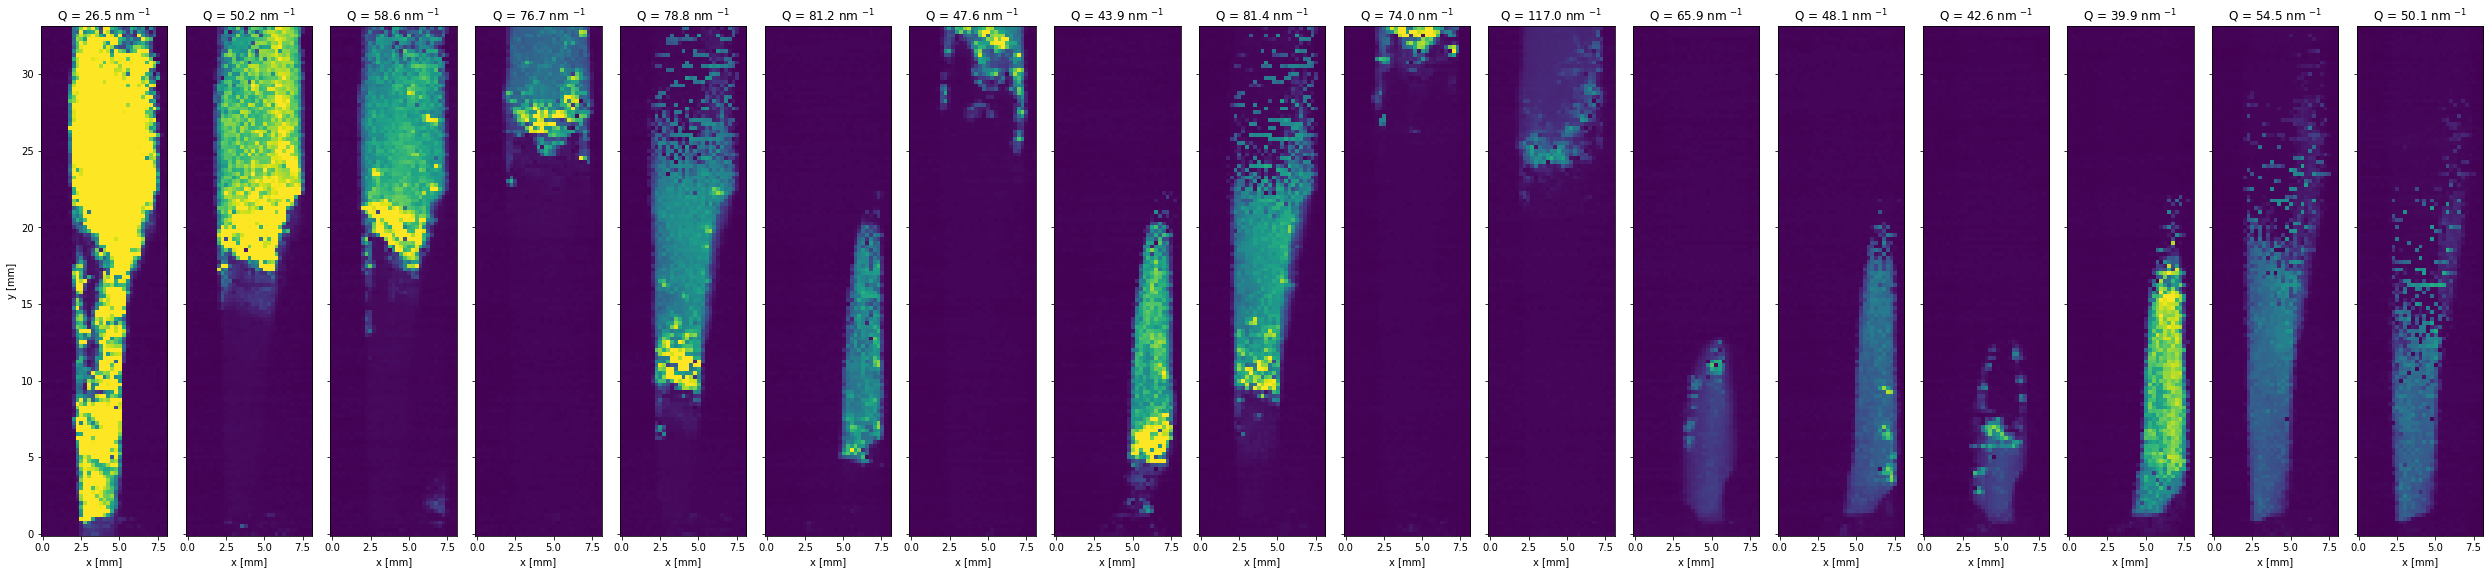

In [66]:
facet = auto_plot_dataset(
    ds_crystal_map.isel({"grain": slice(0, 17)}), 
    title=("Q", "Q = {:.1f} nm $^{{-1}}$"),
    col_wrap=None,
    size=8,
    vmin=0,
    aspect=33 / 133,
    sharey=True,
    sharex=True
)

In [67]:
facet.fig.savefig("./data/figures/crystal_maps_fine_grid.png", dpi=96)

## The example frames in the raw data

In [16]:
calc = Calculator()
calc.frames_arr = image_data

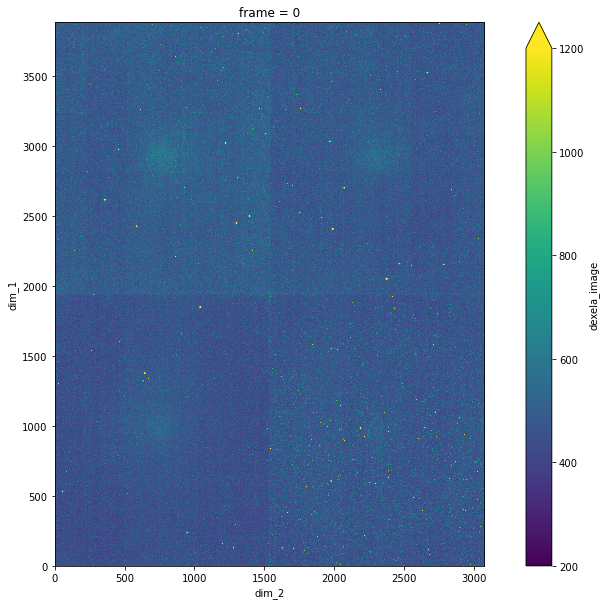

In [23]:
facet = calc.show_frame(0, size=10, vmin=200, vmax=1200)

In [24]:
facet.figure.savefig("./data/figures/frame_0.png", dpi=96)

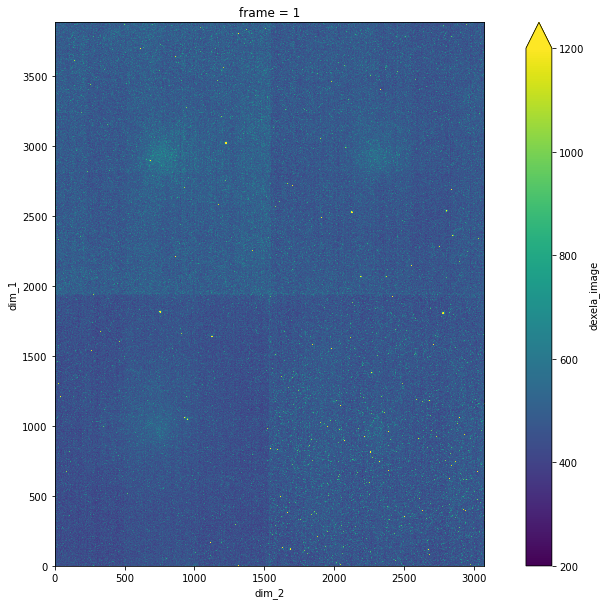

In [25]:
facet = calc.show_frame(1, size=10, vmin=200, vmax=1200)

In [26]:
facet.figure.savefig("./data/figures/frame_1.png", dpi=96)

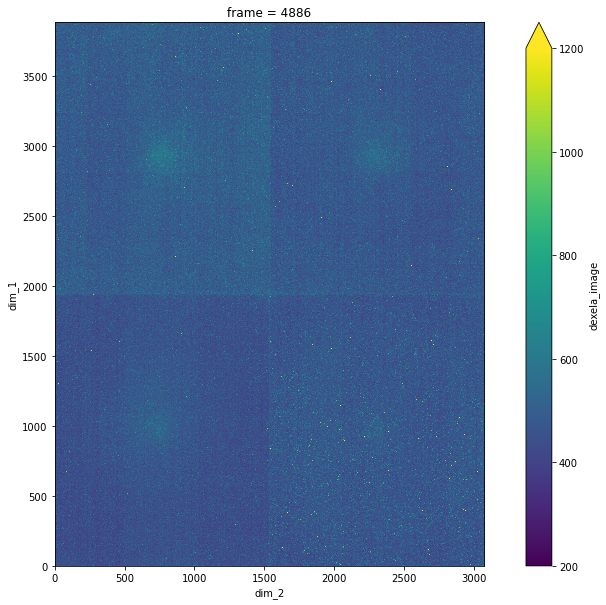

In [27]:
facet = calc.show_frame(4886, size=10, vmin=200, vmax=1200)

In [28]:
facet.figure.savefig("./data/figures/frame_4886.png", dpi=96)

## Dark and light peak tracking

In [61]:
calc = Calculator()
calc.dark = da[0].values
calc.light = da[1].values

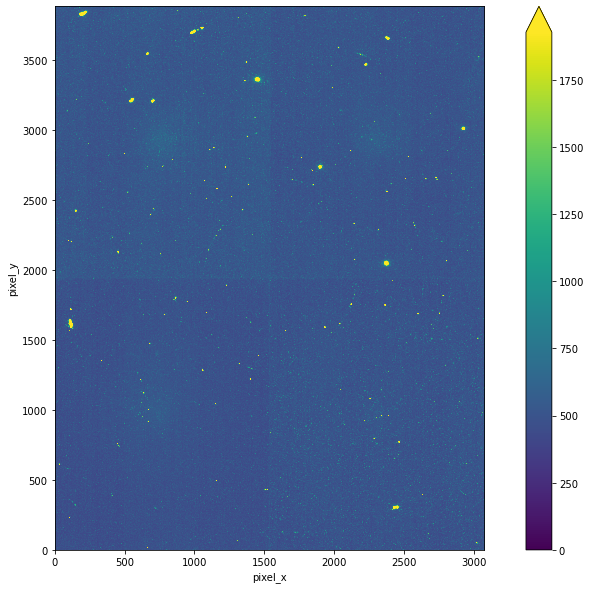

In [64]:
facet = calc.show_light(size=10)

In [66]:
facet.figure.savefig("./data/figures/light.png", dpi=96)

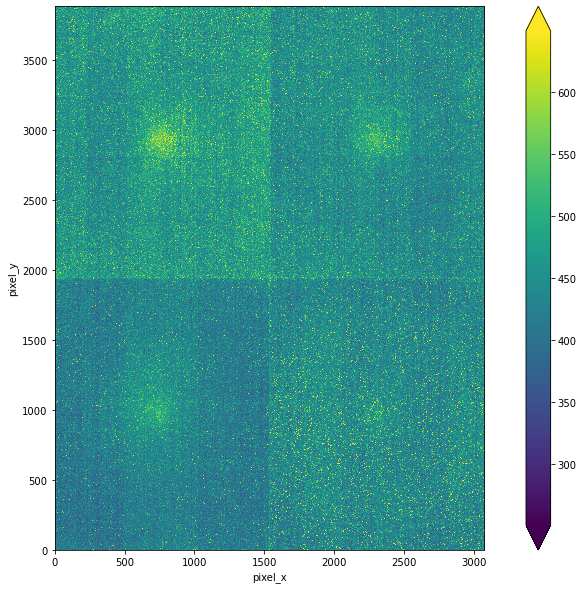

In [67]:
facet = calc.show_dark(size=10)

In [68]:
facet.figure.savefig("./data/figures/dark.png", dpi=96)

## Dark subtracted light image and the windows

In [74]:
calc = Calculator()
calc.dark = da[0].values
calc.light = da[1].values
calc.windows = df

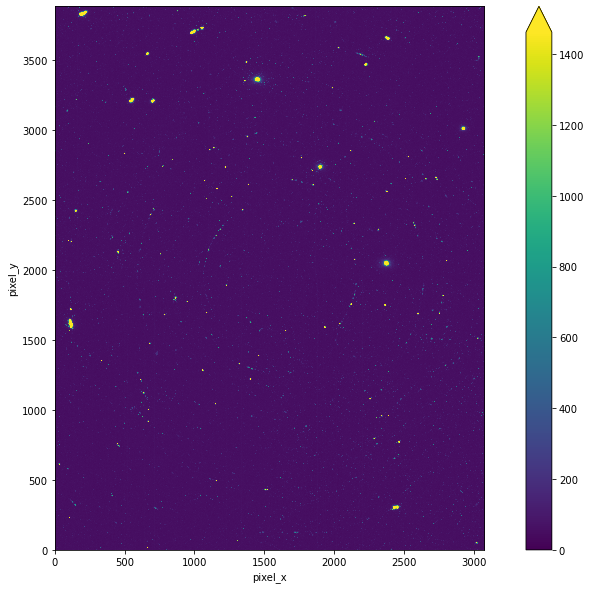

In [75]:
facet = calc.show_light_sub_dark(size=10)

In [76]:
facet.figure.savefig("./data/figures/light_sub_dark.png", dpi=96)

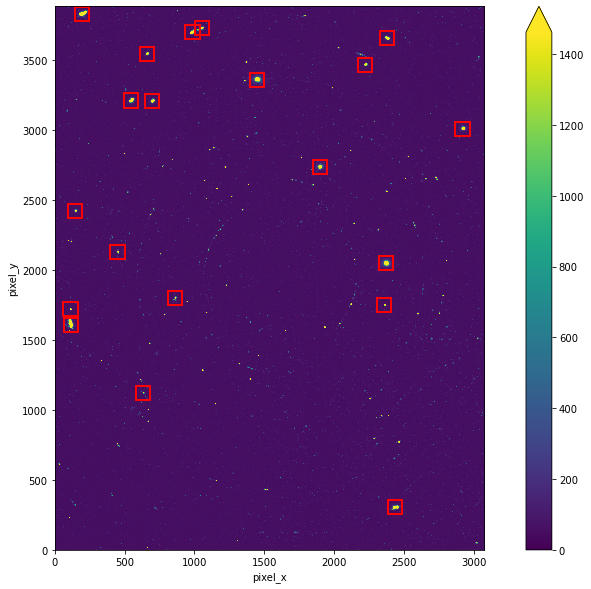

In [77]:
facet = calc.show_windows(size=10)

In [78]:
facet.figure.savefig("./data/figures/windows_on_light_sub_dark.png", dpi=96)

### The windows on the image

In [7]:
calc = Calculator()
calc.frames_arr = image_data
calc.windows = df
calc.light = np.zeros_like(da[1].values)
calc.dark = np.zeros_like(da[1].values)

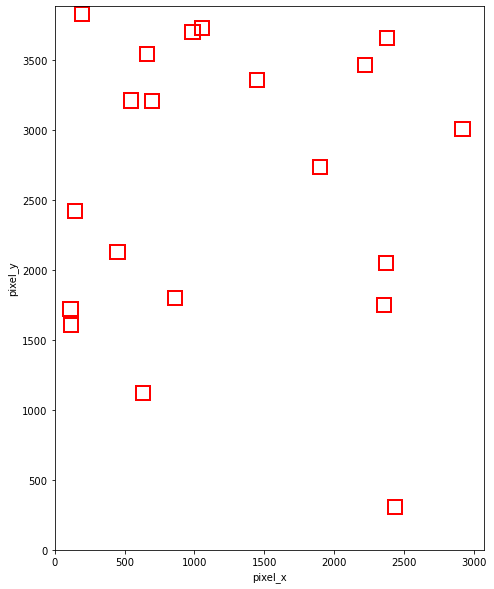

In [8]:
facet = calc.show_windows(size=10, add_colorbar=False, cmap="gray", vmin=-1)

In [82]:
facet.figure.savefig("./data/figures/windows_on_white.png", dpi=96)

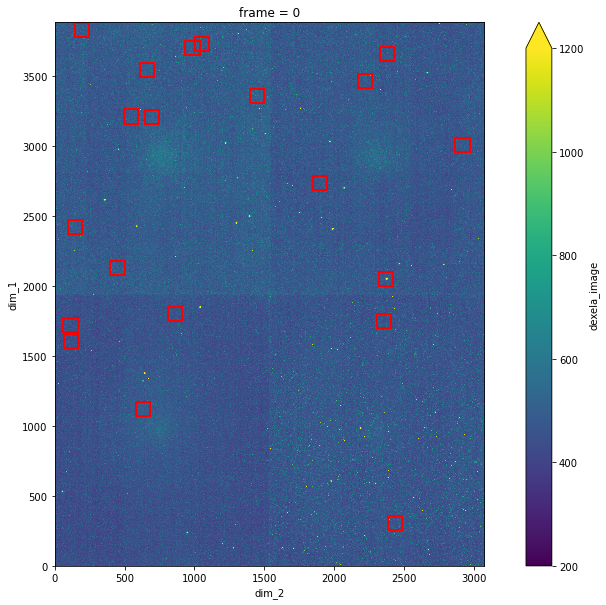

In [83]:
facet = calc.show_windows_on_frame(0, size=10, vmax=1200, vmin=200)

In [85]:
facet.figure.savefig("./data/figures/windows_on_frame_0.png", dpi=96)

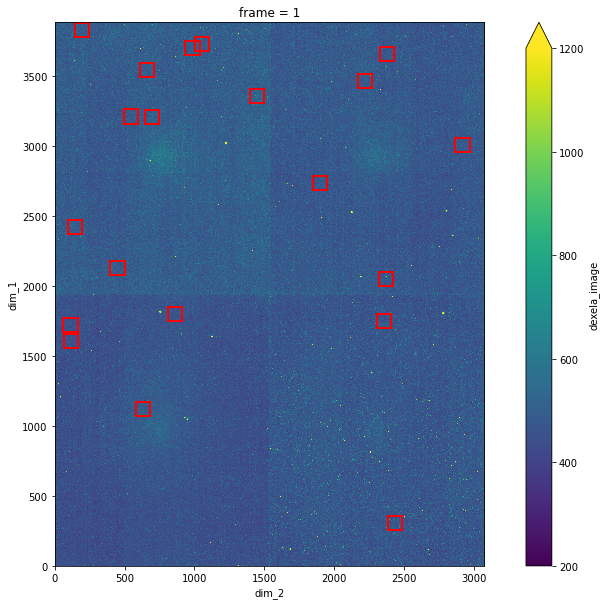

In [86]:
facet = calc.show_windows_on_frame(1, size=10, vmax=1200, vmin=200)

In [87]:
facet.figure.savefig("./data/figures/windows_on_frame_1.png", dpi=96)

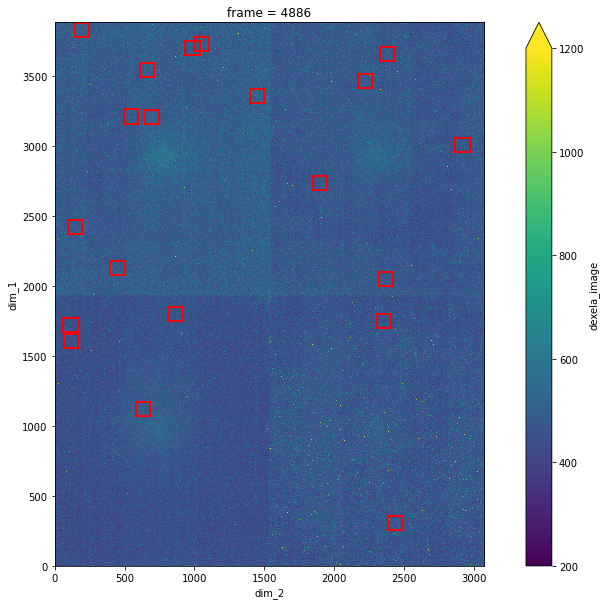

In [9]:
facet = calc.show_windows_on_frame(4886, size=10, vmax=1200, vmin=200)

In [10]:
facet.figure.savefig("./data/figures/windows_on_frame_4886.png", dpi=96)

## Final result

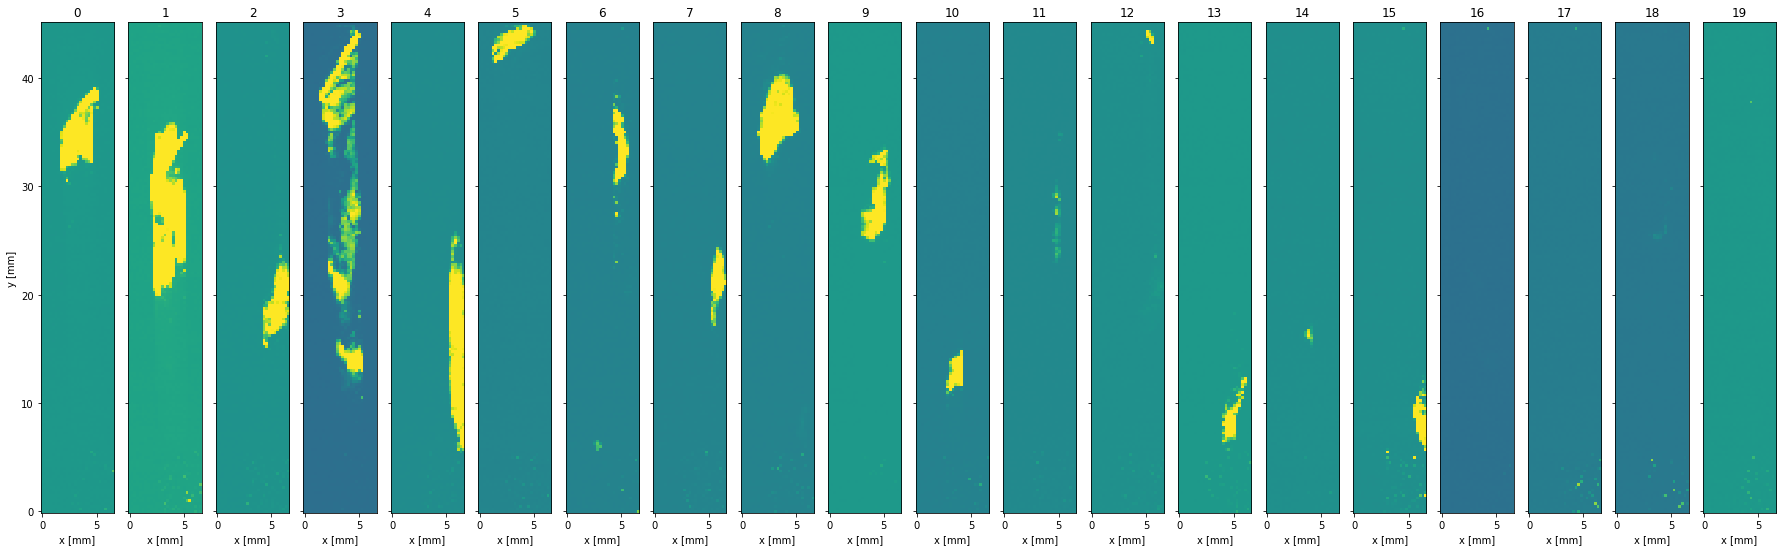

In [34]:
maps = ds.assign_coords({"grain": list(range(20))})["maps"].transpose("dim_0", "dim_1", "grain")
maps["dim_0"].attrs.update({"standard_name": "y", "units": "mm"})
maps["dim_1"].attrs.update({"standard_name": "x", "units": "mm"})
facet = auto_plot(
    maps, 
    title=("grain", "{}"), 
    col="grain", 
    size=8, 
    aspect=27 / 181,
    sharex=True,
    sharey=True,
    invert_y=False
)

In [35]:
facet.fig.savefig("./data/figures/crystal_maps.png", dpi=96)

## Rocking curves

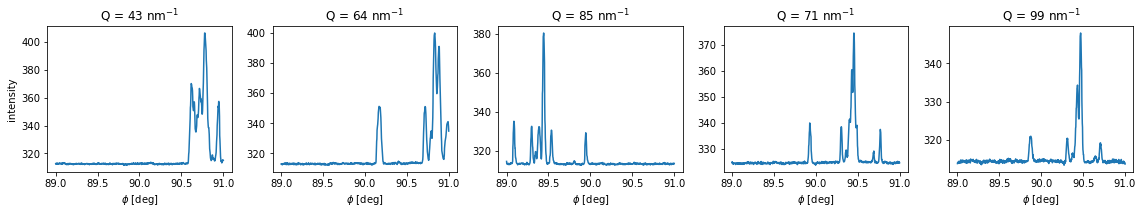

In [25]:
facet = auto_plot_dataset(ds_rocking_curve.isel({"grain": slice(0, 5)}), title=("Q", "Q = {:.0f} nm$^{{-1}}$"))

In [27]:
facet.fig.savefig("./data/figures/rocking_curves.png", dpi=96)

## Gradient Furnace

In [63]:
image = plt.imread("./data/figures/gradient_furnace.png")

In [64]:
temp = np.stack([np.arange(image.shape[1])] * image.shape[0])

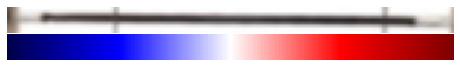

In [67]:
fig, axes = plt.subplots(2, 1, figsize=(8, 1), gridspec_kw={"wspace": 0, "hspace": 0})
axes[0].imshow(image)
axes[0].axis("off")
axes[1].imshow(temp, cmap="seismic")
axes[1].axis("off")
plt.show()

In [68]:
fig.savefig("./data/figures/gradient_furnace_with_temperature.png", dpi=96)